In [207]:
import pandas as pd
import numpy as np
import requests
import json
csvpath='2016_US_County_Level_Presidential_Results.csv'
election_results=pd.read_csv(csvpath)
election_results.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2013
1,1,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2016
2,2,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2020
3,3,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2050
4,4,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2060


In [208]:
indiana_data=election_results.loc[election_results["state_abbr"]=="IN"]
total_counties=indiana_data["county_name"].count()
indiana_data.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
795,795,2802.0,9642.0,13039.0,0.214894,0.739474,"6,840",52.46%,IN,Adams County,18001
796,796,55222.0,83801.0,145787.0,0.378785,0.574818,"28,579",19.60%,IN,Allen County,18003
797,797,9841.0,20637.0,32389.0,0.303838,0.637161,"10,796",33.33%,IN,Bartholomew County,18005
798,798,860.0,2579.0,3654.0,0.235359,0.705802,"1,719",47.04%,IN,Benton County,18007
799,799,1243.0,3349.0,4822.0,0.257777,0.694525,"2,106",43.67%,IN,Blackford County,18009


In [219]:
indiana_fips=indiana_data["combined_fips"]
print(len(indiana_fips))
fips=pd.Series(indiana_fips)
fips=fips.tolist()


92


In [226]:
import plotly.figure_factory as ff

#fips = ['06021', '06023', '06027',
        #'06029', '06033', '06059',
        #'06047', '06049', '06051',
        #'06055', '06061']
values = range(len(fips))

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()


ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo


In [43]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states

# Census API Key
from config import census_api_key
c = Census(census_api_key, year=2016)
import pandas as pd

In [152]:
census_data = c.acs5.get(("NAME", "B01003_001E", "B02001_002E","B02001_003E","B02001_005E","B03001_003E",
                          "B25077_001E","B15003_002E","B15003_017E","B15003_018E",
                         "B15003_021E","B15003_022E","B15003_023E","B15003_024E","B15003_025E"), {'for': 'county:*'})

In [ ]:
census_complete=pd.DataFrame(census_data)
census_complete=census_complete.rename(columns={"B01003_001E":"Total Population",
                                                "B02001_002E":"Population (White)",
                                                "B02001_003E":"Population (African-American)",
                                               "B02001_005E":"Population (Asian)",
                                               "B03001_003E":"Population (Hispanic)",
                                               "B25077_001E":"Median Home Value",
                                               "B15003_002E":"Education (None)",
                                               "B15003_017E":"Education (High School)",
                                               "B15003_018E":"Education (GED)",
                                               "B15003_021E":"Education (Associates)",
                                               "B15003_022E":"Education (Bachelors)",
                                               "B15003_023E":"Education (Masters)",
                                               "B15003_024E":"Education (Professional)",
                                               "B15003_025E":"Education (Doctorate)"})
census_complete.head()
#census_county = census_complete[1].str.split(' ').apply(Series, 1)

In [ ]:
county =census_complete.NAME.str.split(', ', expand=True).loc[:,0]
state=census_complete.NAME.str.split(', ', expand=True).loc[:,1]

In [ ]:
census_complete["County"]=county
census_complete
census_complete["State"]=state
census_complete.head()

In [ ]:
indiana_census=census_complete.loc[census_complete["State"]=="Indiana"]
indiana_census.head()

In [ ]:
count=indiana_census["State"].count()
count


In [ ]:
indiana_final=pd.DataFrame({"State":indiana_census["State"],"County":indiana_census["County"],"Total Population":indiana_census["Total Population"],
                            "Population (White)":indiana_census["Population (White)"],
                            "Population (African-American)":indiana_census["Population (African-American)"],
                           "Population (Asian)":indiana_census["Population (Asian)"],
                           "Population (Hispanic)":indiana_census["Population (Hispanic)"],
                           "Median Home Value":indiana_census["Median Home Value"],
                           "Education (None)":indiana_census["Education (None)"],
                           "Education (High School)":indiana_census["Education (High School)"],
                           "Education (GED)":indiana_census["Education (GED)"],
                           "Education (Associates)":indiana_census["Education (Associates)"],
                           "Education (Bachelors)":indiana_census["Education (Bachelors)"],
                           "Education (Masters)":indiana_census["Education (Masters)"],
                           "Education (Professional)":indiana_census["Education (Professional)"],
                           "Education (Doctorate)":indiana_census["Education (Doctorate)"]})



In [ ]:
indiana_final.head()

In [ ]:
indiana_final.to_csv("indiana_census.csv")

In [ ]:
census_data2 = c.acs5.get(("NAME", "B19013_001E","B19301_001E","B23025_002E","B23025_007E","B23025_005E","B01002_001E",
                           "B01002_002E","B01002_003E"), {'for': 'county:*'})

In [ ]:
census2=pd.DataFrame(census_data2)
#census2.head()
county2 =census2.NAME.str.split(', ', expand=True).loc[:,0]
state2=census2.NAME.str.split(', ', expand=True).loc[:,1]

In [ ]:

census_final2=pd.DataFrame({"County":county2,
                             "State":state2,
                            "Median Income":indiana_census2["B19013_001E"],
                            "Income Per Capita":indiana_census2["B19301_001E"],
                            "Pop in Labor Force":indiana_census2["B23025_002E"],
                            "Pop not in Labor Force":indiana_census2["B23025_007E"],
                            "Unemployed":indiana_census2["B23025_005E"],
                            "Median Age":indiana_census2["B01002_001E"],
                            "Median Age (male)":indiana_census2["B01002_002E"],
                            "Median Age (female)":indiana_census2["B01002_003E"]})
census_final2.head()

In [ ]:
indiana_final2=census_final2.loc[census_final2["State"]=="Indiana"]
indiana_final2.to_csv("indiana_census2.csv")

In [ ]:
census_data2 = c.acs5.get(("NAME", "B01001_049E"), {'for': 'county:*'})
data=pd.DataFrame(census_data2)
data.head()

In [63]:
#collect census data for age groups....
age = c.acs5.get(("NAME", "B01001_031E","B01001_032E","B01001_033E",
                           "B01001_034E","B01001_035E","B01001_036E",
                           "B01001_037E","B01001_038E","B01001_039E",
                          "B01001_040E","B01001_041E","B01001_042E",
                          "B01001_043E","B01001_044E","B01001_045E",
                          "B01001_046E","B01001_047E","B01001_048E","B01001_049E",
                         "B01001_007E","B01001_008E","B01001_009E",
                           "B01001_010E","B01001_011E","B01001_012E",
                           "B01001_013E","B01001_014E","B01001_015E",
                          "B01001_016E","B01001_017E","B01001_018E",
                          "B01001_019E","B01001_020E","B01001_021E",
                          "B01001_022E","B01001_023E","B01001_024E","B01001_025E"), {'for': 'county:*'})
age_sex=pd.DataFrame(age)
age_sex.head()

,NAME,B01001_031E,B01001_032E,B01001_033E,B01001_034E,B01001_035E,B01001_036E,B01001_037E,B01001_038E,B01001_039E,...,B01001_018E,B01001_019E,B01001_020E,B01001_021E,B01001_022E,B01001_023E,B01001_024E,B01001_025E,state,county
0,"Carroll County, Arkansas",205.0,105.0,191.0,414.0,700.0,795.0,601.0,914.0,855.0,...,264.0,767.0,540.0,573.0,654.0,403.0,290.0,274.0,05,015
1,"Chicot County, Arkansas",117.0,81.0,22.0,124.0,294.0,162.0,356.0,369.0,360.0,...,89.0,272.0,140.0,176.0,165.0,139.0,156.0,85.0,05,017
2,"Clark County, Arkansas",995.0,442.0,488.0,810.0,525.0,422.0,581.0,785.0,605.0,...,291.0,427.0,265.0,368.0,296.0,316.0,146.0,151.0,05,019
3,"Clay County, Arkansas",144.0,114.0,58.0,234.0,373.0,422.0,415.0,466.0,512.0,...,217.0,291.0,120.0,289.0,416.0,257.0,190.0,142.0,05,021
4,"Cleburne County, Arkansas",228.0,160.0,142.0,241.0,600.0,654.0,747.0,570.0,755.0,...,326.0,575.0,388.0,550.0,806.0,678.0,382.0,281.0,05,023


In [64]:
county3 =age_sex.NAME.str.split(', ', expand=True).loc[:,0]
state3=age_sex.NAME.str.split(', ', expand=True).loc[:,1]


In [71]:
age_sex_complete=pd.DataFrame({"State":state3,"County":county3,
                            "Female (18-19)":age_sex["B01001_031E"],"Female (20)":age_sex["B01001_032E"],
                            "Female (21)":age_sex["B01001_033E"],"Female (22-24)":age_sex["B01001_034E"],
                            "Female (25-29)":age_sex["B01001_035E"],"Female (30-34)":age_sex["B01001_036E"],
                             "Female (35-39)":age_sex["B01001_037E"],
                            "Female (40-44)":age_sex["B01001_038E"],"Female (45-49)":age_sex["B01001_039E"],
                            "Female (50-54)":age_sex["B01001_040E"],"Female (55-59)":age_sex["B01001_041E"],
                            "Female (60-61)":age_sex["B01001_042E"],"Female (62-64)":age_sex["B01001_043E"],
                            "Female (65-66)":age_sex["B01001_044E"],"Female (67-69)":age_sex["B01001_045E"],
                            "Female (70-74)":age_sex["B01001_046E"],"Female (75-79)":age_sex["B01001_047E"],
                            "Female (80-84)":age_sex["B01001_048E"],"Female (85 and over)":age_sex["B01001_049E"],
                              "Male (18-19)":age_sex["B01001_007E"],"Male (20)":age_sex["B01001_008E"],
                            "Male (21)":age_sex["B01001_009E"],"Male (22-24)":age_sex["B01001_010E"],
                            "Male (25-29)":age_sex["B01001_011E"],"Male (30-34)":age_sex["B01001_012E"],
                             "Male (35-39)":age_sex["B01001_013E"],
                            "Male (40-44)":age_sex["B01001_014E"],"Male (45-49)":age_sex["B01001_015E"],
                            "Male (50-54)":age_sex["B01001_016E"],"Male (55-59)":age_sex["B01001_017E"],
                            "Male (60-61)":age_sex["B01001_018E"],"Male (62-64)":age_sex["B01001_019E"],
                            "Male (65-66)":age_sex["B01001_020E"],"Male (67-69)":age_sex["B01001_021E"],
                            "Male (70-74)":age_sex["B01001_022E"],"Male (75-79)":age_sex["B01001_023E"],
                            "Male (80-84)":age_sex["B01001_024E"],"Male (85 and over)":age_sex["B01001_025E"]})

indiana_ages=age_sex_complete.loc[age_sex_complete["State"]=="Indiana"]
indiana_ages.head()


,State,County,Female (18-19),Female (20),Female (21),Female (22-24),Female (25-29),Female (30-34),Female (35-39),Female (40-44),...,Male (50-54),Male (55-59),Male (60-61),Male (62-64),Male (65-66),Male (67-69),Male (70-74),Male (75-79),Male (80-84),Male (85 and over)
759,Indiana,Adams County,362.0,145.0,250.0,644.0,951.0,971.0,921.0,996.0,...,1024.0,994.0,397.0,572.0,337.0,335.0,536.0,451.0,194.0,277.0
760,Indiana,Allen County,4552.0,2281.0,2508.0,7806.0,12736.0,12169.0,11963.0,11260.0,...,12109.0,11663.0,4438.0,5673.0,3468.0,4189.0,4994.0,3427.0,2335.0,2145.0
761,Indiana,Bartholomew County,733.0,540.0,332.0,1488.0,2671.0,2482.0,2691.0,2570.0,...,2661.0,2376.0,1000.0,1428.0,804.0,1094.0,1359.0,943.0,633.0,437.0
762,Indiana,Benton County,85.0,30.0,55.0,127.0,216.0,258.0,210.0,299.0,...,318.0,332.0,104.0,158.0,77.0,129.0,179.0,141.0,54.0,39.0
763,Indiana,Blackford County,147.0,29.0,53.0,238.0,331.0,319.0,326.0,367.0,...,470.0,456.0,160.0,273.0,219.0,187.0,256.0,202.0,106.0,97.0


In [229]:
indiana_ages.to_csv("indiana_ages.csv")

In [74]:
indiana_ages.columns

Index(['State', 'County', 'Female (18-19)', 'Female (20)', 'Female (21)',
       'Female (22-24)', 'Female (25-29)', 'Female (30-34)', 'Female (35-39)',
       'Female (40-44)', 'Female (45-49)', 'Female (50-54)', 'Female (55-59)',
       'Female (60-61)', 'Female (62-64)', 'Female (65-66)', 'Female (67-69)',
       'Female (70-74)', 'Female (75-79)', 'Female (80-84)',
       'Female (85 and over)', 'Male (18-19)', 'Male (20)', 'Male (21)',
       'Male (22-24)', 'Male (25-29)', 'Male (30-34)', 'Male (35-39)',
       'Male (40-44)', 'Male (45-49)', 'Male (50-54)', 'Male (55-59)',
       'Male (60-61)', 'Male (62-64)', 'Male (65-66)', 'Male (67-69)',
       'Male (70-74)', 'Male (75-79)', 'Male (80-84)', 'Male (85 and over)'],
      dtype='object')

In [118]:
indiana_ages_total=pd.DataFrame({"County":indiana_ages["County"],
                                "Pop (18-19)":indiana_ages["Female (18-19)"]+indiana_ages["Male (18-19)"],
                                "Pop (20)":indiana_ages["Female (20)"]+indiana_ages["Male (20)"],
                                "Pop (21)":indiana_ages["Female (21)"]+indiana_ages["Male (21)"],
                                "Pop (22-24)":indiana_ages["Female (22-24)"]+indiana_ages["Male (22-24)"],
                                "Pop (25-29)":indiana_ages["Female (25-29)"]+indiana_ages["Male (25-29)"],
                                "Pop (30-34)":indiana_ages["Female (30-34)"]+indiana_ages["Male (30-34)"],
                                "Pop (35-39)":indiana_ages["Female (35-39)"]+indiana_ages["Male (35-39)"],
                                "Pop (40-44)":indiana_ages["Female (40-44)"]+indiana_ages["Male (40-44)"],
                                "Pop (45-49)":indiana_ages["Female (45-49)"]+indiana_ages["Male (45-49)"],
                                "Pop (50-54)":indiana_ages["Female (50-54)"]+indiana_ages["Male (50-54)"],
                                "Pop (55-59)":indiana_ages["Female (55-59)"]+indiana_ages["Male (55-59)"],
                                "Pop (60-61)":indiana_ages["Female (60-61)"]+indiana_ages["Male (60-61)"],
                                "Pop (62-64)":indiana_ages["Female (62-64)"]+indiana_ages["Male (62-64)"],
                                "Pop (65-66)":indiana_ages["Female (65-66)"]+indiana_ages["Male (65-66)"],
                                "Pop (67-69)":indiana_ages["Female (67-69)"]+indiana_ages["Male (67-69)"],
                                "Pop (70-74)":indiana_ages["Female (70-74)"]+indiana_ages["Male (70-74)"],
                                "Pop (75-79)":indiana_ages["Female (75-79)"]+indiana_ages["Male (75-79)"],
                                "Pop (80-84)":indiana_ages["Female (80-84)"]+indiana_ages["Male (80-84)"],
                                "Pop (85 and over)":indiana_ages["Female (85 and over)"]+indiana_ages["Male (85 and over)"]})

indiana_ages_total
marion=indiana_ages_total.loc[indiana_ages_total["County"]=="Marion County"]
#indiana_counties=indiana_ages_total["County"].unique()
#indiana_counties
marion_data=marion.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values.flatten().tolist()



In [97]:
indiana_ages_total.head()

,County,Pop (18-19),Pop (20),Pop (21),Pop (22-24),Pop (25-29),Pop (30-34),Pop (35-39),Pop (40-44),Pop (45-49),Pop (50-54),Pop (55-59),Pop (60-61),Pop (62-64),Pop (65-66),Pop (67-69),Pop (70-74),Pop (75-79),Pop (80-84),Pop (85 and over)
759,Adams County,780.0,490.0,535.0,1117.0,1904.0,2064.0,1864.0,1948.0,2001.0,2100.0,2032.0,877.0,1119.0,687.0,868.0,1076.0,881.0,525.0,996.0
760,Allen County,9334.0,4671.0,5232.0,15024.0,24951.0,24079.0,23368.0,22458.0,22876.0,24523.0,24219.0,8953.0,11838.0,7299.0,8902.0,11118.0,7948.0,5969.0,6697.0
761,Bartholomew County,1671.0,1035.0,804.0,3146.0,5761.0,5299.0,5000.0,5514.0,5371.0,5308.0,5222.0,1790.0,2898.0,1873.0,2127.0,2941.0,2172.0,1500.0,1379.0
762,Benton County,184.0,64.0,105.0,319.0,460.0,509.0,437.0,560.0,593.0,671.0,653.0,222.0,310.0,166.0,249.0,391.0,277.0,157.0,177.0
763,Blackford County,285.0,114.0,120.0,448.0,698.0,640.0,588.0,800.0,790.0,918.0,901.0,324.0,591.0,395.0,391.0,580.0,511.0,289.0,284.0


In [228]:
indiana_ages_total.to_csv("indiana_pop_age.csv")


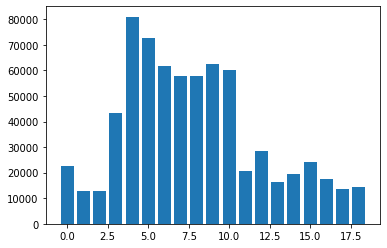

In [122]:
#create histogram for 
x_axis=np.arange(len(marion_data))

plt.bar(x_axis,marion_data);

In [126]:
daviess=indiana_ages_total.loc[indiana_ages_total["County"]=="Daviess County"]
#indiana_counties=indiana_ages_total["County"].unique()
#indiana_counties
daviess_data=daviess.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values.flatten().tolist()

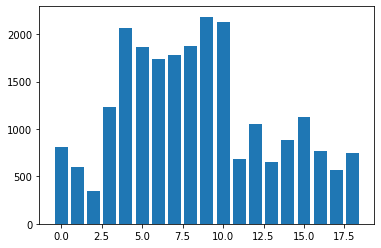

In [127]:
x_axis=np.arange(len(daviess_data))
plt.bar(x_axis,daviess_data);

In [129]:
tippecanoe=indiana_ages_total.loc[indiana_ages_total["County"]=="Tippecanoe County"]
monroe=indiana_ages_total.loc[indiana_ages_total["County"]=="Monroe County"]
tippecanoe_data=tippecanoe.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values.flatten().tolist()
monroe_data=monroe.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values.flatten().tolist()
x_axis=np.arange(len(tippecanoe_data))

In [139]:
#ax = plt.subplot(111)
#ax.bar(x-0.2, y, width=0.2, color='b', align='center')
#ax.bar(x, z, width=0.2, color='g', align='center')
#ax.bar(x+0.2, k, width=0.2, color='r', align='center')
#ax.xaxis_date()




In [183]:
#tippecanoe male vs female
tippecanoe=indiana_ages.loc[indiana_ages["County"]=="Tippecanoe County"]
tippecanoe_female=tippecanoe.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values.flatten().tolist()
tippecanoe_male=tippecanoe.iloc[:,[21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]].values.flatten().tolist()
categories=["18-19","20","21","22-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-61",
           "62-64","65-66","67-69","70-74","75-79","80-84","85 & over"]

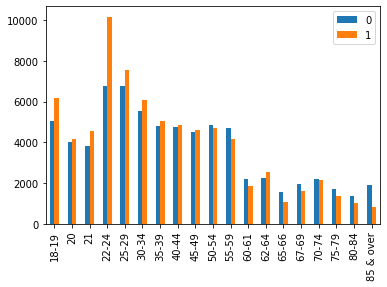

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tippecanoe_df=pd.DataFrame(np.c_[tippecanoe_female,tippecanoe_male],index=categories)
tippecanoe_df.plot.bar();



In [181]:
#monroe male vs female
monroe=indiana_ages.loc[indiana_ages["County"]=="Monroe County"]
monroe_female=monroe.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values.flatten().tolist()
monroe_male=monroe.iloc[:,[21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]].values.flatten().tolist()
categories=["18-19","20","21","22-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-61",
           "62-64","65-66","67-69","70-74","75-79","80-84","85 & over"]

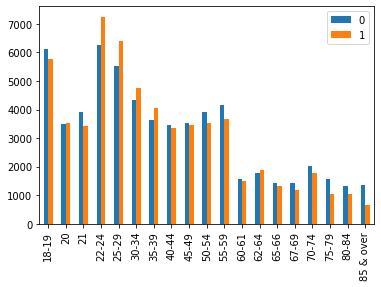

In [182]:
monroe_df=pd.DataFrame(np.c_[monroe_female,monroe_male],index=categories)
monroe_df.plot.bar();

In [179]:
#marion male vs female
marion=indiana_ages.loc[indiana_ages["County"]=="Marion County"]
marion_female=marion.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values.flatten().tolist()
marion_male=marion.iloc[:,[21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]].values.flatten().tolist()
categories=["18-19","20","21","22-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-61",
           "62-64","65-66","67-69","70-74","75-79","80-84","85 & over"]

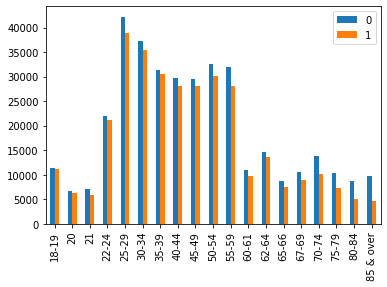

In [180]:
marion_df=pd.DataFrame(np.c_[marion_female,marion_male],index=categories)
marion_df.plot.bar();

In [177]:
#daviess male vs female
daviess=indiana_ages.loc[indiana_ages["County"]=="Daviess County"]
daviess_female=daviess.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values.flatten().tolist()
daviess_male=daviess.iloc[:,[21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]].values.flatten().tolist()
categories=["18-19","20","21","22-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-61",
           "62-64","65-66","67-69","70-74","75-79","80-84","85 & over"]

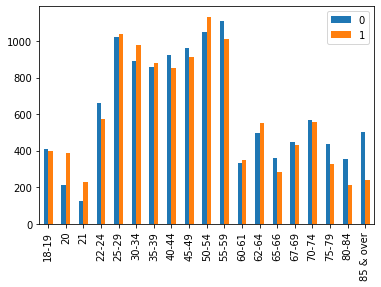

In [178]:
daviess_df=pd.DataFrame(np.c_[daviess_female,daviess_male],index=categories)
daviess_df.plot.bar();

In [175]:
#daviess male vs female
lake=indiana_ages.loc[indiana_ages["County"]=="Lake County"]
lake_female=lake.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values.flatten().tolist()
lake_male=lake.iloc[:,[21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]].values.flatten().tolist()
categories=["18-19","20","21","22-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-61",
           "62-64","65-66","67-69","70-74","75-79","80-84","85 & over"]


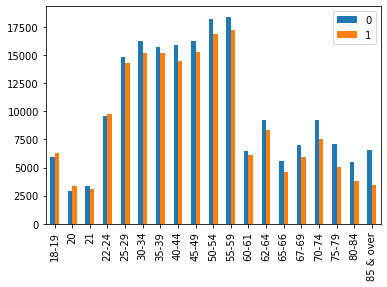

In [176]:
lake_df=pd.DataFrame(np.c_[lake_female,lake_male],index=categories)
lake_df.plot.bar();